# 트리
이진분류 

In [8]:
#p106
from sklearn.linear_model import LinearRegression, LogisticRegression #예측용, 분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #분류용, 예측용

In [37]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
#cancer = load_breast_cancer() #유방암 데이터
cancer = load_iris()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9910714285714286, 0.9210526315789473)

In [39]:
#108 트리그림그리기
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names, feature_names=cancer.feature_names, impurity=False, filled=True)

In [40]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

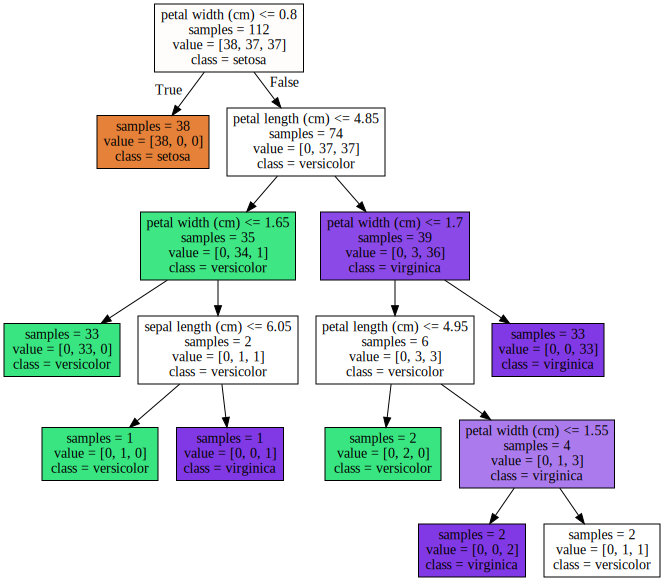

In [41]:
import graphviz #anaconda prompt /pip install graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [43]:
import pandas as pd

In [45]:
df = pd.DataFrame(data=[[1,2,'man'], [2,3,'woman']], columns=['a','b','c'])
df

,a,b,c
0,1,2,man
1,2,3,woman


In [46]:
df.dtypes #오브젝트 타입을 숫자로 바꿔줘야됨, man을 1로 woman을 2로 바꾸지 못함.(이유: man+man=2?, man과 woman의 가운데값은?)

a     int64
b     int64
c    object
dtype: object

In [ ]:
pd.get_dummies(df)

In [ ]:
시간은 범주에 해당(이유: 0시~24시까지만 있으므로)
날짜는 범주에 해당(이유: 1000년과 3000년 사이가 2000년인가?)
사람의 키는 연속에 해당
사람의 나이는 목적에 따라 범주 혹은 연속에 해당

# 타이타닉 생존기

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [48]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [49]:
df.Name.nunique()

887

In [50]:
df = df.set_index('Name')

In [51]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [52]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [53]:
df.Survived.mean() #약 38% 생존

0.3855693348365276

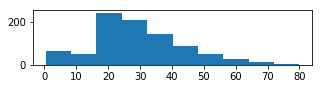

In [55]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

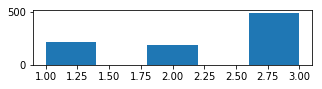

In [57]:

plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [58]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

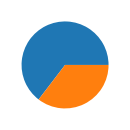

In [60]:
plt.figure(figsize=(5,2))
p = plt.pie(df['Sex'].value_counts())

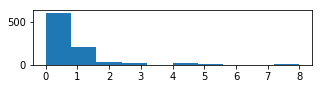

In [72]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

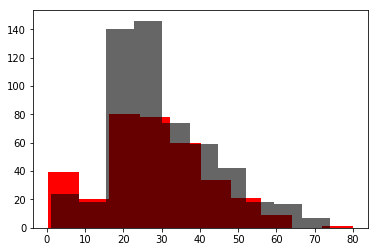

In [71]:

p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.6)

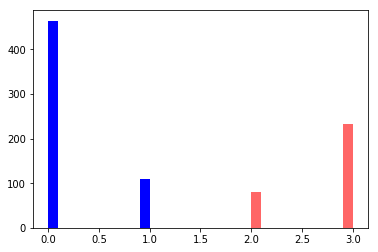

In [70]:

p = plt.hist(df[df['Sex']=='male']['Survived'].values, color='blue')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color='red', alpha=0.6)

In [62]:
#1,2,3등석은 범주형입니다.
df['Pclass'] = df['Pclass'].astype('object')

In [63]:
data = pd.get_dummies(df)

In [64]:
X = data.drop(columns='Survived') #생존율 빼고 나머지 전부
y = data['Survived'] #생존율 (우리가 구하고자 하는것)

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [66]:
model.score(X,y)

0.8489289740698985

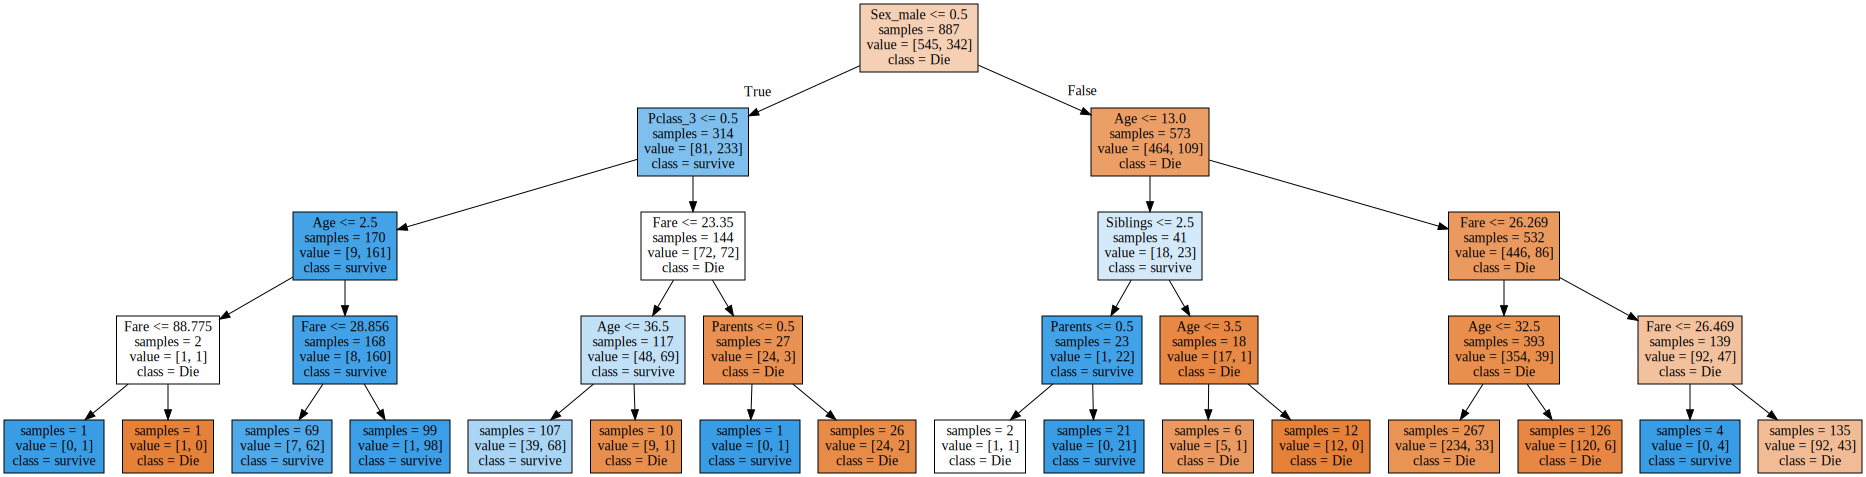

In [73]:

export_graphviz(model, out_file='titanic.dot', class_names=['Die','survive'],
               feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)